# Demo for how to track single quantum dots (QDs) on images

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../../sl2pm')

import track_qd
from models import qd_blurred
from misc import fitted_params

## Load four consecutive images of QDs in the brain

In [2]:
images = np.load('qd_images.npy')

## Enter PMT parameters (known from the calibration)

In [3]:
ALPHA = 0.452
SIGMA = 8.5
GAIN = 3/ALPHA

## Fit images of QDs
### After each fit, we show raw image and its fit on the left and right panels, respectively. Cyan marker in the left panel shows the fitted center of the QD

Fitting image 1/4...
Optimization terminated successfully.
Fitting image 2/4...
Optimization terminated successfully.
Fitting image 3/4...
Optimization terminated successfully.
Fitting image 4/4...
Optimization terminated successfully.


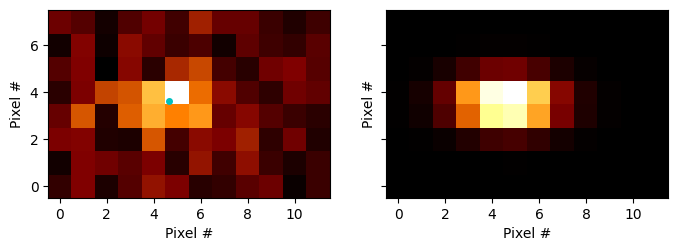

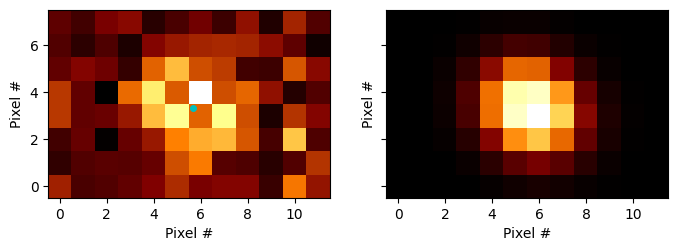

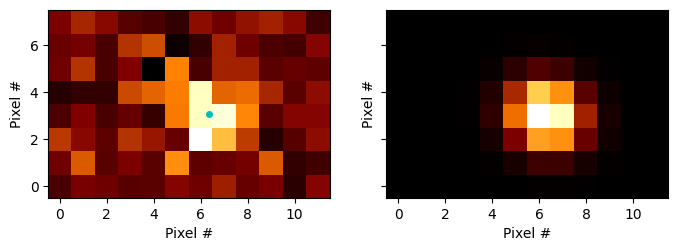

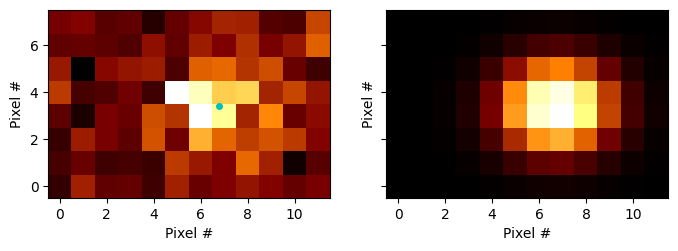

In [4]:
X, Y = track_qd.make_xy_grid(images[0])


for i, im in enumerate(images, start=1):
    
    print(f'Fitting image {i}/{len(images)}...')
    
    optim_res = track_qd.mle_fit(im, 
                                 ALPHA, 
                                 SIGMA, 
                                 mu=0, 
                                 sigma_blur=1, 
                                 delta_s=5, 
                                 s_max=700, 
                                 minimize_options=dict(gtol=1e-3)
                                )
    
    print(optim_res.message)
    
    pars = fitted_params(optim_res, ['b', 'A', 'xo', 'yo', 'sx', 'sy', 'theta'])

    fit = qd_blurred(X, Y, *[val for val, err in pars.values()])
    
    ### Plot original image and its fit
    fig, [ax_im, ax_fit] = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
    
    ax_im.imshow(im, cmap='afmhot', vmax=im.max(), vmin=im.min(), aspect='equal', origin='lower')
    ax_im.set_ylabel('Pixel #')
    ax_im.set_xlabel('Pixel #')
    
    ax_im.plot(pars['xo'][0], pars['yo'][0], marker='.', markersize=8, c='c')

    ax_fit.imshow(fit, cmap='afmhot', vmax=fit.max(), vmin=fit.min(), aspect='equal', origin='lower')
    ax_fit.set_ylabel('Pixel #')
    ax_fit.set_xlabel('Pixel #')